In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
%matplotlib inline

from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
X = df.drop('target', axis=1)
y = df['target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [9]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [10]:
model.score(X_test, y_test)

1.0

In [11]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 0,
       0, 1, 0, 2, 1, 1, 0, 0])

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  7]], dtype=int64)

Text(60.0, 0.5, 'Truth')

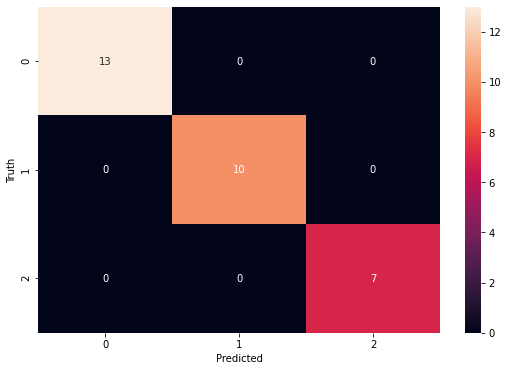

In [13]:
plt.figure(figsize=(9,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
# Compare the output with Samples
output = pd.DataFrame(y_test[0:10])
output['predicted'] = y_pred[0:10]
#output['difference'] = output['predicted'] - output['class']
print(output,"\n")

     target  predicted
113       2          2
60        1          1
44        0          0
36        0          0
15        0          0
29        0          0
66        1          1
136       2          2
62        1          1
41        0          0 

